<a href="https://colab.research.google.com/github/dohi1004/AI-teamProject-brailleTranslation/blob/main/Team6_Final_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# **AI Team Project Final Presentation**

### **Team 6**

16102269 Kim Jong Gyu

19102095 Lee Do Hui
***



# **1. Motivation For The Proeject**
* Similar to general language, braille is different according to the world. 
* It's hard to understand for the blind when they need to read foreign braille. 
* Therfore, we try to translate foreign braille to foreign text and then translate it to their language. And finally, our application generates the voice of translated text through Text-to-Speech API. 
* In education, it can be also usefully adopted. 
  * Sejong Foundation [1] developed two books, 1) Braille books and 2) Voice books for helping the foreign blind to learn Korean language. That is, the blind can learn new foreign language based on the braille and voice. 

* We expect that our application helps the blind to read foreign braille easily and also helps them learn foreign language. 

# **2. Problem Description**

This is the scenario for our application.

Sam is French blind who doesn't know English braille.

1. There is English braille and Sam take a picture of it.
2. He uses our application, and English braille is firstly tranlated into English (with Braille Translation)
3. Then, English is translated into French (with Neural Machine Translation)
4. Finally, French is transformed to voice and played. (Text-to-Speech API)

So, based on the use case, our focus is on..

### **Braille translation and language translation: how accurately we can translate the braille to their language**

#### 1) Braille Translation

Translate English braille (image) to English (text).

#### 2) Language Translation

Translate English (text) to French (text).




# **3. Data Description**

### **Braille Translation**

* Braille Characteristics
  * Braille should basically have six points placed at equal intervals.
  * Braille should not be inverted too much (less than 90 degree).
  * Spaces should be written at regular intervals.
* Kaggle Data [2]
  * Problems

    1) There are pictures with a rotation of more than 90 degrees and indistinguishable.
     <img src = "https://drive.google.com/uc?id=1VeUkM0AQPdw3uxnFWUu8bq5vyGjoeKef" height = 300 width = 500>
    
    2) Only alphabets are used except for special characters.

    <img src = "https://drive.google.com/uc?id=1UQ8jsegwxsHsrih4eBFWJR3wS4a66JgO" height = 300 width = 500>

    

* **Actual data we used**
  * We make dataset by drawing it ourselves using PPT.

    <img src = "https://drive.google.com/uc?id=1ZunHu0KumEkiVuFcUvJGYG2cIHza_Vw3" height = 300 width = 500>
  
  * **Actual data**
  
    <img src = "https://drive.google.com/uc?id=1Kwm0NxQTKBNKQ4Z-Gau56bMnLlWFF948" height = 300 width = 500>
  

### **Neural Machine Translation**

*   For neural machine translation model, we used dataset comprised of French phrases and their English counterparts. The dataset is available from the http://www.manythings.org/anki/, with examples drawn from the Tatoeba Project.

<img src = "https://drive.google.com/uc?id=1zgHVKVLXsjyD4re6bWE5baV0q71J4yQo" height = 250 width = 500>

* The fra.txt file contains pairs of English to French phrases, one pair per line with a tab separating the language. Total pairs of sentences are 197,463.

<img src = "https://drive.google.com/uc?id=1-WO41TvUqFickYyjN298293hUtBSZRUs" height = 150 width = 600>

------------------
Preprocessing process of each data is explained in **5. Implementation Details**

------------------

# **4.Model Architecture**

### 1) Model 1: Convolutional Neural Network (2D-CNN) for Braille Translation
a model consisting of three SeperableConv2D layers and max pooling layers.

*   Last layer activation function:softmax (multi-class classification, braille image to corresponding character)
*   Optimizer: Adam
*   Loss function: categorical_crossentropy 


### 2) Model 2: Sequence-to-Sequence model - LSTM & GRU for Neural Machine Translation
**Encoder-Decoder based model**
<!-- 다양한 길이의 input/output 을 동일한 길이의 memory에 할당한다.
-> 그래서 input 의 길이는 다양해도 상관 없음 (Maps variable-length sequence to fixed-length memory) -->
--------------------
* Input Language: English

* Output Language: French
---------------

1. Encoder

  It reads the input sequence and summarizes the information in one vector, called context vector (in LSTM, hidden state and cell state vectors). This context vector aims to contain all information for all input elements to help the decoder make accurate predictions. The hidden and cell state of the network is passed along to the decoder as input. 

2. Decoder

  It interprets the context vector obtained from the encoder. The context vecotr of the encoder's final cell is input to the first cell of the decoder network. Using these initial states, the decoder starts generating the output sequence, and these outputs are also considered for futrue predictions. 

*   Last layer activation function:softmax (multi-class classification, English text to French text)
*   Optimizer: Adam
*   Loss function: sparse_categorical_crossentropy (decoder_outputs are integer labels, not one-hot encoded)



<img src = "https://drive.google.com/uc?id=1XChI2rJDoa6r8nL7hcBEELICLT-bDK8N" height = 300 width = 800>

----------------------


3) Final Architecture



<img src = "https://drive.google.com/uc?id=1PRGd8u2JUUeMloKnRxjW9zLl3WaDxJlu" height = 400 width = 850>

# **5. Implementation Details**

## **Part1. Braille Translation Model** 
* Firstly, we detected simple convnet model using Kaggle Data
* Model consisting of three convolutional layers and max pooling layers.

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
def createFolder(directory):
      if not os.path.exists(directory):
          os.makedirs(directory)

In [10]:
import numpy as np
import pandas as pd
from shutil import copyfile

dir = '/content/gdrive/MyDrive/AI/teamProject/Data/'
createFolder(dir + 'existing_dataset/')
alpha = 'a'
for i in range(0, 26): 
    createFolder(dir+ 'existing_dataset/' + alpha)
    alpha = chr(ord(alpha) + 1)

rootdir = '/content/gdrive/MyDrive/AI/teamProject/Data/braillset/'

for file in os.listdir(rootdir):
    letter = file[0]
    copyfile(rootdir + file, dir + 'existing_dataset/' + letter + '/' + file) 

In [12]:
from keras.preprocessing.image import ImageDataGenerator

prev_img_dir = "/content/gdrive/MyDrive/AI/teamProject/Data/existing_dataset/"

datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(prev_img_dir,
                                              target_size=(28,28),
                                              subset='training')

val_generator = datagen.flow_from_directory(prev_img_dir,
                                            target_size=(28,28),
                                            subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [13]:
#Simple convnet

from tensorflow.keras import layers
from tensorflow.keras import models
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping


def Make_simple_model(train,val):
  model = models.Sequential()
  path = "/content/gdrive/MyDrive/Model/"
  model_ckpt = ModelCheckpoint(path+'BrailleNet_simple.h5',save_best_only=True)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 3))) 
  model.add(layers.MaxPooling2D((2, 2))) 
  model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
  model.add(layers.MaxPooling2D((2, 2))) 
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(26, activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = model.fit_generator(train,
                              epochs=30,
                              callbacks=[model_ckpt],
                              validation_data=val)
  return history

In [14]:
history_simple = Make_simple_model(train_generator,val_generator)

Epoch 1/30


<ipython-input-13-89990d0c5617>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train,


39/39 [==============================] - 11s 86ms/step - loss: 9.1122 - accuracy: 0.0337 - val_loss: 3.2600 - val_accuracy: 0.0385
Epoch 2/30
39/39 [==============================] - 3s 81ms/step - loss: 3.2366 - accuracy: 0.0417 - val_loss: 3.1937 - val_accuracy: 0.0737
Epoch 3/30
39/39 [==============================] - 3s 82ms/step - loss: 3.1302 - accuracy: 0.0745 - val_loss: 3.0915 - val_accuracy: 0.1250
Epoch 4/30
39/39 [==============================] - 4s 115ms/step - loss: 2.9459 - accuracy: 0.1506 - val_loss: 2.7831 - val_accuracy: 0.1987
Epoch 5/30
39/39 [==============================] - 3s 85ms/step - loss: 2.6067 - accuracy: 0.2564 - val_loss: 2.3373 - val_accuracy: 0.3333
Epoch 6/30
39/39 [==============================] - 3s 84ms/step - loss: 2.1309 - accuracy: 0.3982 - val_loss: 1.7616 - val_accuracy: 0.4808
Epoch 7/30
39/39 [==============================] - 3s 87ms/step - loss: 1.6527 - accuracy: 0.5545 - val_loss: 1.4489 - val_accuracy: 0.5897
Epoch 8/30
39/39 [====

### **First model visualize training results**



In [15]:
def print_acc_loss(history):
    import matplotlib.pyplot as plt
    fig, loss_ax = plt.subplots(figsize=(10, 5))
    acc_ax = loss_ax.twinx()
    loss_ax.plot(history.history['loss'], 'y', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

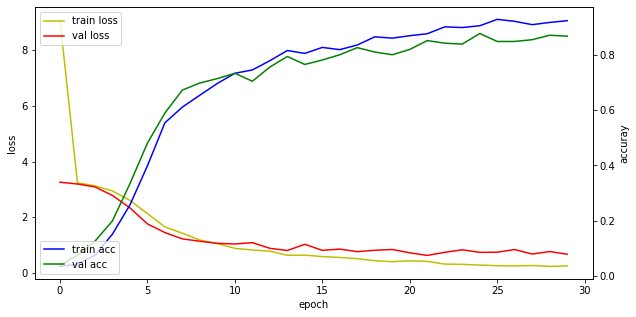

In [16]:
print_acc_loss(history_simple)

### **First model accuracy**

In [36]:
def load_model(model_name):
  from keras.models import load_model
  model = load_model('/content/gdrive/MyDrive/Model/' + model_name)
  return model

def acc_chk(model, val):
  acc = model.evaluate_generator(val)[1]
  print('model accuracy: {}'.format(round(acc,4)))

In [37]:
# first model accuray
model_simple = load_model('BrailleNet_simple.h5')
acc = model_simple.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

<ipython-input-37-4eef31f6a2d2>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model_simple.evaluate_generator(val_generator)[1]


model accuracy: 0.8494


# **5.2 Second Model**
* Secondly, we detected CNN model with SeperableConv2D using Kaggle Data
* Add Features:
  * ReduceLROnPlateau : This is the part to improve the learning rate during model learning. If you fall into a local pit before reaching your final goal, adjust the learning rate to get out.
  * EarlyStopping : If there is no significant change during learning, get out. Overfitting and underfitting can be properly determined.
  * kernel_regularizer: Regularizer to apply a penalty on the layer's kernel using L2
  * SperableConv2D


###**SeperableConv2D [3]** 
* Depthwise Conv + Pointwise Conv
  
  <img src = "https://drive.google.com/uc?id=159W63eJVfpUz_x98OIJWw75gWdOD-yNj" height = 150 width = 500>

* Comparing MobileNet results above consisting of general convs only with MobileNet below, which adds Depthwise Separable Convolution Layer, the accuracy is reduced, but Multi-Adds and parameters are reduced by about 88.3% and 85.7%.


In [38]:
#Using Seperable con 

from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

def Make_second_model(train,val):
  K.clear_session()
  reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
  path = "/content/gdrive/MyDrive/Model/"
  model_ckpt = ModelCheckpoint(path+'BrailleNet_second.h5',save_best_only=True)
  early_stop = EarlyStopping(patience=15,verbose=1)
  entry = L.Input(shape=(28, 28 ,3))
  x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
  x = L.MaxPooling2D((2,2))(x)
  x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
  x = L.MaxPooling2D((2,2))(x)
  x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
  x = L.GlobalMaxPooling2D()(x)
  x = L.Dense(256)(x)
  x = L.LeakyReLU()(x)
  x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
  x = L.LeakyReLU()(x)
  x = L.Dense(26,activation='softmax')(x)
  
  model = Model(entry,x)
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = model.fit_generator(train_generator,validation_data=val_generator,epochs=30,
                              callbacks=[model_ckpt,reduce_lr,early_stop],verbose=0)
  return history

In [39]:
history_second = Make_second_model(train_generator,val_generator)

<ipython-input-38-60278b2cacb5>:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,validation_data=val_generator,epochs=30,





### **Second model visualize training results**

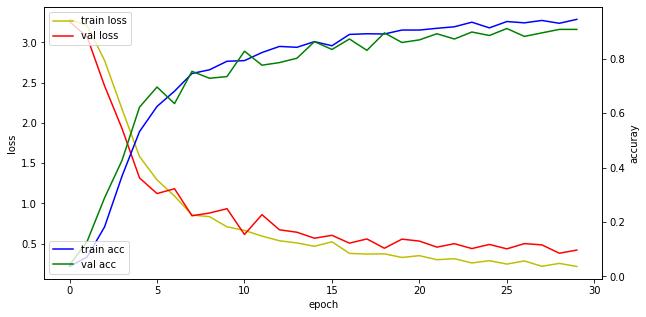

In [40]:
print_acc_loss(history_second)

### **Third model accuracy**

In [44]:
from keras.models import Model,load_model
path = "/content/gdrive/MyDrive/Model/"
model_second = load_model(path + 'BrailleNet_second.h5')
acc = model_second.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

<ipython-input-44-d7db9fb7e454>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model_second.evaluate_generator(val_generator)[1]


model accuracy: 0.8718


# **5.3 Third Model**
* Thirdly, we detected CNN model by referring to the contents of the paper [4].
<img src = "https://drive.google.com/uc?id=1TCEppgk86gHO_0N7sgcfUQpKxmsQyw9i" height = 300 width = 500>
* There are three ways to improve the performance of the CNN model:
  * Increase channels
  * Increase the layer
  * Increase original resolution

<img src = "https://drive.google.com/uc?id=1yCQONsNp3YvSMbEPiKnZdmEKqrUYrlWg" height = 300 width = 500>

* In the same paper, show a higher performance growth rate when the resolution of the input image is high even in the same model.

* ### **In CNN, the size of the filter is very important. The accuracy depends on how you use the filter.**

```
 entry = L.Input(shape=(36,36,3))
    x = L.SeparableConv2D(64,(3,3),activation='relu',padding ='same')(entry)
    x = L.MaxPooling2D((2,2))(x)

    x = L.SeparableConv2D(128,(3,3),activation='relu',padding ='same')(x)
    x = L.MaxPooling2D((2,2))(x)

    x = L.SeparableConv2D(256,(2,2),activation='relu',padding ='same')(x)
    x = L.GlobalMaxPooling2D()(x)
```
* Using Conv2D, we find it using 64 kernels and its strid is 3*3.

<img src = "https://drive.google.com/uc?id=1k92Ls5MWK3lOei96U2It9GLGE4OlxZ98" height = 300 width = 200>

* When increasing the resolution, it is better to increase the stride value as well.

* ### **Changed the resolution of the image to 50 * 50 and the filter size to 10 * 10**

```
    entry = L.Input(shape=(50,50,3))
    x = L.SeparableConv2D(128, (10,10), activation='relu', padding='same')(entry)
    x = L.MaxPooling2D((2, 2))(x)
    x = L.SeparableConv2D(256,(10,10),activation='relu',padding ='same')(x)
    x = L.MaxPooling2D((2,2))(x)
```

* This is the approximate size of the image and the size of the filter

<img src = "https://drive.google.com/uc?id=1RHLRBWx7ULvnQh7fCiQmPvxsj2c17Y4K" height = 200 width = 150>

In [53]:
from tensorflow.keras import backend as K
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

def Make_model(train, val):
    K.clear_session()

    model_ckpt = ModelCheckpoint('/content/gdrive/MyDrive/Model/BrailleNet_thrid.h5',save_best_only=True)
    reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
    early_stop = EarlyStopping(patience=5,verbose=2,monitor='accuracy')

    entry = L.Input(shape=(50,50,3))
    x = L.SeparableConv2D(128, (10,10), activation='relu', padding='same')(entry)
    x = L.MaxPooling2D((2, 2))(x)
    x = L.SeparableConv2D(256,(10,10),activation='relu',padding ='same')(x)
    x = L.MaxPooling2D((2,2))(x)
    x = L.SeparableConv2D(512,(10,10),activation='relu',padding ='same')(x)
    x = L.GlobalMaxPooling2D()(x)

    x = L.Dense(512)(x)
    x = L.LeakyReLU()(x)
    x = L.Dense(256)(x)
    x = L.ReLU()(x)
    x = L.Dense(128,kernel_regularizer=l2(2e-4))(x)
    x = L.ReLU()(x)
    x = L.Dense(26,activation='softmax')(x)

    model = Model(entry,x)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    history = model.fit_generator(train,validation_data=val,epochs=30,
                                  callbacks=[model_ckpt,reduce_lr,early_stop],verbose=1)
    
    return history


In [49]:
prev_img_dir = "/content/gdrive/MyDrive/AI/teamProject/Data/existing_dataset/"

datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(prev_img_dir,
                                              target_size=(50,50),
                                              subset='training')

val_generator = datagen.flow_from_directory(prev_img_dir,
                                            target_size=(50,50),
                                            subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [54]:
history_third = Make_model(train_generator,val_generator)

Epoch 1/30


<ipython-input-53-399679881629>:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train,validation_data=val,epochs=30,


39/39 [==============================] - 6s 135ms/step - loss: 3.3032 - accuracy: 0.0353 - val_loss: 3.2775 - val_accuracy: 0.0321 - lr: 0.0010
Epoch 2/30
39/39 [==============================] - 4s 101ms/step - loss: 3.2630 - accuracy: 0.0345 - val_loss: 3.1831 - val_accuracy: 0.0801 - lr: 0.0010
Epoch 3/30
39/39 [==============================] - 4s 100ms/step - loss: 3.2490 - accuracy: 0.0449 - val_loss: 3.2622 - val_accuracy: 0.0385 - lr: 0.0010
Epoch 4/30
39/39 [==============================] - 5s 124ms/step - loss: 2.9319 - accuracy: 0.1170 - val_loss: 2.5004 - val_accuracy: 0.2564 - lr: 0.0010
Epoch 5/30
39/39 [==============================] - 4s 101ms/step - loss: 2.3360 - accuracy: 0.2564 - val_loss: 1.9816 - val_accuracy: 0.3558 - lr: 0.0010
Epoch 6/30
39/39 [==============================] - 4s 100ms/step - loss: 1.9921 - accuracy: 0.4103 - val_loss: 1.5714 - val_accuracy: 0.5321 - lr: 0.0010
Epoch 7/30
39/39 [==============================] - 4s 104ms/step - loss: 1.3955 

### **Third model visualize training results**



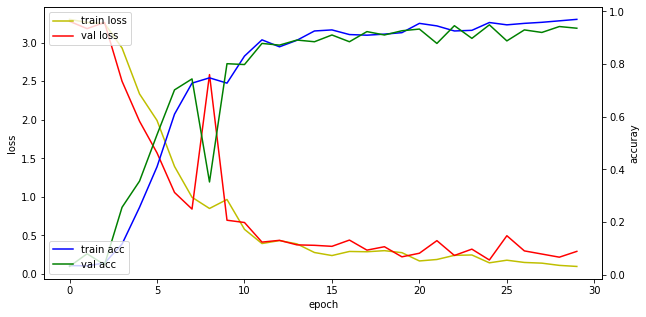

In [55]:
print_acc_loss(history_third)

### **Third model accuracy**

In [57]:
from keras.models import Model,load_model
model_second = load_model('/content/gdrive/MyDrive/Model/BrailleNet_thrid.h5')
acc = model_second.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

<ipython-input-57-81070074e61e>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model_second.evaluate_generator(val_generator)[1]


model accuracy: 0.9295


# **5.4 Final braille Model**

### **Data Augmentation**
* Using ImageDataGenerator
* Generate 20 data images for each braille. 
* Generate 10 data images for space.


In [58]:
import os

file_path = '/content/gdrive/MyDrive/AI/teamProject/Data'
createFolder(file_path+'/new_dataset')

In [59]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.05,
        zoom_range=0.01,
        fill_mode='constant',
        cval=255
        )

def newGenerateData():
  files = os.listdir(file_path + '/dataset')
  for file in files:
    if(os.path.splitext(file)[1] == '.png'):
      filename = os.path.splitext(file)[0]
      createFolder(file_path + '/new_dataset/'+ filename)
      img = load_img(file_path+'/dataset/'+file)  # PIL 이미지
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      if file == 'space.png':
        import shutil
        for _ in range(10):
          print(_,file, file_path +'/dataset/'+file)
          shutil.copy(file_path+'/dataset/'+file, file_path + '/new_dataset/'+ filename + '/' + filename + str(_) + '.jpg')
      else:
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir= file_path + '/new_dataset/'+ filename, save_prefix=filename, save_format='jpg'):
          i += 1
          if i > 20:
            break  

newGenerateData()


0 space.png /content/gdrive/MyDrive/AI/teamProject/Data/dataset/space.png
1 space.png /content/gdrive/MyDrive/AI/teamProject/Data/dataset/space.png
2 space.png /content/gdrive/MyDrive/AI/teamProject/Data/dataset/space.png
3 space.png /content/gdrive/MyDrive/AI/teamProject/Data/dataset/space.png
4 space.png /content/gdrive/MyDrive/AI/teamProject/Data/dataset/space.png
5 space.png /content/gdrive/MyDrive/AI/teamProject/Data/dataset/space.png
6 space.png /content/gdrive/MyDrive/AI/teamProject/Data/dataset/space.png
7 space.png /content/gdrive/MyDrive/AI/teamProject/Data/dataset/space.png
8 space.png /content/gdrive/MyDrive/AI/teamProject/Data/dataset/space.png
9 space.png /content/gdrive/MyDrive/AI/teamProject/Data/dataset/space.png


### **Make training set and validation set**
* Validation set : 20% of total data
* Training set : 80% of total data

In [60]:
from keras_preprocessing.image import ImageDataGenerator

def data_ready():
    images_dir = '/content/gdrive/MyDrive/AI/teamProject/Data/new_dataset'

    datagen = ImageDataGenerator(rotation_range=5,
                                 shear_range=5,
                                 validation_split=0.2,
                                 ) #20%를 검증모델로 사용.

    train_generator = datagen.flow_from_directory(images_dir,
                                                  target_size=(50,50),
                                                  subset='training')

    val_generator = datagen.flow_from_directory(images_dir,
                                                target_size=(50,50),
                                                subset='validation')

    return train_generator, val_generator

def load_image(img_path, input_size):
    images_dir = img_path
    datagen = ImageDataGenerator()
    real_generator = datagen.flow_from_directory(images_dir,
                                                 target_size=(input_size, input_size))

    return real_generator

### **Training final model**


In [64]:
from tensorflow.keras import backend as K
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

def Make_final_model(train, val):
    K.clear_session()

    model_ckpt = ModelCheckpoint('/content/gdrive/MyDrive/Model/BrailleNet_final.h5',save_best_only=True)
    reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
    early_stop = EarlyStopping(patience=5,verbose=2,monitor='accuracy')

    entry = L.Input(shape=(50,50,3))
    x = L.SeparableConv2D(128, (10,10), activation='relu', padding='same')(entry)
    x = L.MaxPooling2D((2, 2))(x)
    x = L.SeparableConv2D(256,(10,10),activation='relu',padding ='same')(x)
    x = L.MaxPooling2D((2,2))(x)
    x = L.SeparableConv2D(512,(10,10),activation='relu',padding ='same')(x)
    x = L.GlobalMaxPooling2D()(x)

    x = L.Dense(512)(x)
    x = L.LeakyReLU()(x)
    x = L.Dense(256)(x)
    x = L.ReLU()(x)
    x = L.Dense(128,kernel_regularizer=l2(2e-4))(x)
    x = L.ReLU()(x)
    x = L.Dense(32,activation='softmax')(x)

    model = Model(entry,x)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    history = model.fit_generator(train,validation_data=val,epochs=30,
                                  callbacks=[model_ckpt,reduce_lr,early_stop],verbose=1)
    
    return history

In [63]:
train_generator, val_generator = data_ready()

Found 535 images belonging to 32 classes.
Found 126 images belonging to 32 classes.


In [65]:
hist = Make_final_model(train_generator,val_generator)

Epoch 1/30


<ipython-input-64-e4be545a87e3>:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train,validation_data=val,epochs=30,


17/17 [==============================] - 3s 138ms/step - loss: 3.5282 - accuracy: 0.0243 - val_loss: 3.4849 - val_accuracy: 0.0317 - lr: 0.0010
Epoch 2/30
17/17 [==============================] - 2s 115ms/step - loss: 3.4843 - accuracy: 0.0299 - val_loss: 3.4504 - val_accuracy: 0.0317 - lr: 0.0010
Epoch 3/30
17/17 [==============================] - 2s 117ms/step - loss: 3.3422 - accuracy: 0.0766 - val_loss: 2.8545 - val_accuracy: 0.2063 - lr: 0.0010
Epoch 4/30
17/17 [==============================] - 2s 113ms/step - loss: 2.1340 - accuracy: 0.3589 - val_loss: 1.1750 - val_accuracy: 0.6349 - lr: 0.0010
Epoch 5/30
17/17 [==============================] - 2s 112ms/step - loss: 0.8384 - accuracy: 0.7364 - val_loss: 0.5008 - val_accuracy: 0.8730 - lr: 0.0010
Epoch 6/30
17/17 [==============================] - 2s 112ms/step - loss: 0.2047 - accuracy: 0.9533 - val_loss: 0.0493 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 7/30
17/17 [==============================] - 2s 109ms/step - loss: 0.0450 

### **Final model visualize training results**


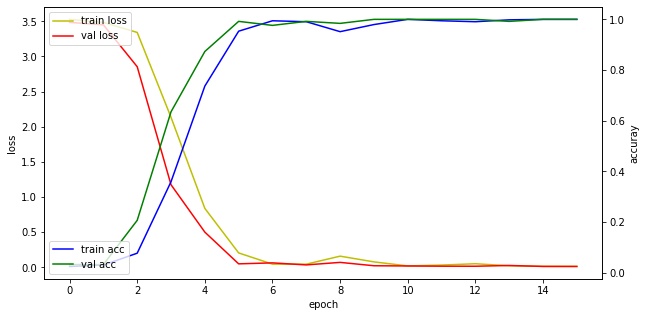

In [66]:
print_acc_loss(hist)

### **Final model accuracy**

In [67]:
from keras.models import Model,load_model
model_final = load_model('/content/gdrive/MyDrive/Model/BrailleNet_final.h5')
acc = model_final.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

<ipython-input-67-36d4214d1c5e>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model_final.evaluate_generator(val_generator)[1]


model accuracy: 1.0


# **5.5 Test using final braille model**

In [81]:
import PIL.Image as Img
import numpy as np


def get_test_img(path):
  img = Img.open(path).convert('RGB')
  img = img.resize((50,50))
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)

  return x


In [82]:
from functools import update_wrapper
from keras.models import Model,load_model
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

def decode_predict(result,labels):
  max = np.max(result)
  index = np.where(result == max)
  return labels[index[1][0]]

def translate(test_image):
  dir = os.listdir('/content/gdrive/MyDrive/AI/teamProject/Data/dataset')
  tmp = []
  for file in dir:
    if(os.path.splitext(file)[1] == '.png'):
      tmp.append(file.split('.')[0])
  dir = tmp
  dir.sort()
  print(dir)
  model = load_model('/content/gdrive/MyDrive/Model/BrailleNet_final.h5')
  result = model.predict(test_image)
  decoded = decode_predict(result,dir)
  return(decoded)

def convert_test_img(input_img):
  img = input_img.convert('RGB')
  img = img.resize((50,50))
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)
  return x

### **Test character case using testset**

In [83]:
import PIL.Image as Img
test_file = '/content/gdrive/MyDrive/AI/teamProject/Data/testset/test_q.png'
input = get_test_img(test_file)
print(translate(input))

['a', 'b', 'c', 'comma', 'd', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 'space', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [==============================] - 0s 139ms/step
q



### **Make test case about sentence**
* If you can enter input sentence, you make braille notation corresponding input.

####Reason
* It is difficult to crop braille pictures because the ratio of the images actually used is not accurate.

In [ ]:
#Make test datset
import cv2
import numpy as np

def make_test(word):
  path = '/content/gdrive/MyDrive/AI/teamProject/Data/dataset'
  store_path = '/content/gdrive/MyDrive/AI/teamProject/Data/dataset'
  result_img = np.zeros((50,50,3), np.uint8)
  for ch in word:
    if ch == ' ':
      img = cv2.imread(path+'/space.png')
      img = cv2.resize(img,(50,50))
      result_img = cv2.hconcat([result_img,img])
    elif ch == '!':
      img = cv2.imread(path+'/exclamation_point.png')
      img = cv2.resize(img,(50,50))
      result_img = cv2.hconcat([result_img,img])
    elif ch == ',':
      img = cv2.imread(path+'/comma.png')
      img = cv2.resize(img,(50,50))
      result_img = cv2.hconcat([result_img,img])
    elif ch == '.':
      img = cv2.imread(path+'/period.png')
      img = cv2.resize(img,(50,50))
      result_img = cv2.hconcat([result_img,img])
    elif ch == '?':
      img = cv2.imread(path+'/question_mark.png')
      img = cv2.resize(img,(50,50))
      result_img = cv2.hconcat([result_img,img])
    else:
      if word.find(ch) == 0:
        if ch.isupper():
          result_img = cv2.imread(path+'/upper.png')
          result_img = cv2.resize(result_img,(50,50))
          ch = ch.lower()
          img = cv2.imread(path+'/'+ ch +'.png')
          img = cv2.resize(img,(50,50))
          result_img = cv2.hconcat([result_img,img])
        else:
          result_img = cv2.imread(path+'/'+ ch +'.png')
          result_img = cv2.resize(result_img,(50,50))
      else:
        if ch.isupper():
          print(ch)
          img = cv2.imread(path+'/upper.png')
          img = cv2.resize(img,(50,50))
          result_img = cv2.hconcat([result_img,img])
          ch = ch.lower()
          img = cv2.imread(path+'/'+ ch +'.png')
          img = cv2.resize(img,(50,50))
          result_img = cv2.hconcat([result_img,img])
        else:
          img = cv2.imread(path+'/'+ ch +'.png')
          img = cv2.resize(img,(50,50))
          result_img = cv2.hconcat([result_img,img])
  cv2.imwrite(store_path+'/'+word+'.png', result_img)
make_test('I am a student')

### **Translate a set of english braille notation into English sentence**

In [252]:
from PIL import Image
import os

def divide_img(fileName):
  path = '/content/gdrive/MyDrive/AI/teamProject/Data/testset/'
  dir = os.listdir('/content/gdrive/MyDrive/AI/teamProject/Data/dataset')
  tmp = []
  for file in dir:
    if(os.path.splitext(file)[1] == '.png'):
      tmp.append(file.split('.')[0])
      dir = tmp
      dir.sort()
  img = Image.open(path+fileName)
  (width,height) = img.size
  print(width, height)
  iterate_num = width // height
  iterate_num = int(iterate_num)
  start_point = 0
  size = height
  end_point = height
  text = ''

  special_character_dir = {'space': ' ', 'exclamation_point': '!', 'comma': ',', 'period':'.', 
                           'question_mark': '?'}
  keyList = special_character_dir.keys()
  translated_sentence = ''
  isUpper = False
  for i in range(0, iterate_num):
    area = (start_point, 0, end_point, height)
    cropped_img = img.crop(area)
    result = translate(convert_test_img(cropped_img))
    start_point = end_point
    end_point += size
    if result == 'upper':
      isUpper = True
      continue
    if isUpper == True:
      result = result.upper()
      isUpper = False
    if result in keyList:
      result = special_character_dir[result]
    print(result)
    translated_sentence += result

  return translated_sentence
result = divide_img('I like busy place.png')

648 36
['a', 'b', 'c', 'comma', 'd', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 'space', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [==============================] - 0s 81ms/step
['a', 'b', 'c', 'comma', 'd', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 'space', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [==============================] - 0s 181ms/step
I
['a', 'b', 'c', 'comma', 'd', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 'space', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [==============================] - 0s 81ms/step
 
['a', 'b', 'c', 'comma', 'd', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 'space', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [===

In [253]:
result

'I like busy place'

In [254]:
braille_sentence = result

#  **Part2. NMT model (English -> French)**


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/') 

Mounted at /content/gdrive/


In [100]:
import os
import re
import shutil
import zipfile

import numpy as np
import pandas as pd
import tensorflow as tf
import unicodedata
import urllib3
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

### **Data**

* Parallel corpus data 

- source: English

- target: French



In [ ]:
length = 0
with open("./gdrive/MyDrive/AI/teamProject/fra.txt", "r", encoding='UTF-8') as lines:
        for i, line in enumerate(lines):
            length+=1
print(length)

197463


In [101]:
import pandas as pd
data = pd.read_csv("./gdrive/MyDrive/AI/teamProject/fra.txt", delimiter = "\t")
data.columns = ["en", "fr", "cc"]
data

,en,fr,cc
0,Go.,Marche.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,En route !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Go.,Bouge !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Hi.,Salut !,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
4,Hi.,Salut.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
...,...,...,...
197457,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
197458,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
197459,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
197460,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


## **Data Preprocessing**

In [102]:
def to_ascii(s):
    # delete accent in French
    # EX) : 'déjà diné' -> deja dine
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')

def preprocess_sentence(sent):
    # Call accent deletion function
    sent = to_ascii(sent.lower())
    
    # Add blank between word and punctuation 
    # ex) "I am a student." => "I am a student ."
    sent = re.sub(r"([?.!,¿])", r" \1", sent)
    
    # Except (a-z, A-Z, ".", "?", "!", ","), transform others to blank
    sent = re.sub(r"[^a-zA-Z!.?]+", r" ", sent)
    
    # Transform multiple blanks to one blank
    sent = re.sub(r"\s+", " ", sent)
    
    return sent

In [103]:
# Preprocessing Test
en_sent = u"Have you had dinner?"
fr_sent = u"Avez-vous déjà diné?"

print('Before preprocessing English sentence :', en_sent)
print('After preprocessing English sentence :',preprocess_sentence(en_sent))
print('Before preprocessing French sentence :', fr_sent)
print('After preprocessing French sentence :', preprocess_sentence(fr_sent))

Before preprocessing English sentence : Have you had dinner?
After preprocessing English sentence : have you had dinner ?
Before preprocessing French sentence : Avez-vous déjà diné?
After preprocessing French sentence : avez vous deja dine ?


In [104]:
def load_preprocessed_data():
    encoder_input, decoder_input, decoder_target = [], [], []
    src_seqlen = 0
    tar_seqlen = 0
    with open("./gdrive/MyDrive/AI/teamProject/fra.txt", "r", encoding='UTF-8') as lines:
        for i, line in enumerate(lines):
            # split source data and target data 
            src_line, tar_line, _ = line.strip().split('\t')
            
            # preprocess source data
            preprocessed_sen = preprocess_sentence(src_line)
            src_line = [w for w in preprocessed_sen.split()]
            for w in preprocessed_sen.split():
              if len(w) > src_seqlen:
                src_seqlen = len(w)
            
            # preprocess target data -> we'll use teacher forcing in training phase, so divide decoder's input sequence and original value (label)
            tar_line = preprocess_sentence(tar_line)
            for w in tar_line.split():
              if len(w) > tar_seqlen:
                tar_seqlen = len(w)
            #  For target sequence (French) adding <sos> meaning start and <eos> meaning end.  
            tar_line_in = [w for w in ("<sos> " + tar_line).split()]
            tar_line_out = [w for w in (tar_line + " <eos>").split()]
            
            encoder_input.append(src_line)
            decoder_input.append(tar_line_in)
            decoder_target.append(tar_line_out)
            
            if i == num_samples - 1:
                break
        
    return encoder_input, decoder_input, decoder_target, src_seqlen, tar_seqlen

In [90]:
num_samples = 70000 # we use 70000 among about 190000 data

In [105]:
# Top 5 samples
sents_en_in, sents_fra_in, sents_fra_out, src_seqlen, tar_seqlen = load_preprocessed_data()
print('Input of Encoder :',sents_en_in[:5])
print('Input of Decoder :',sents_fra_in[:5])
print('Label of Decoder :',sents_fra_out[:5])
print(src_seqlen)
print(tar_seqlen)

Input of Encoder : [['go', '.'], ['go', '.'], ['go', '.'], ['go', '.'], ['hi', '.']]
Input of Decoder : [['<sos>', 'va', '!'], ['<sos>', 'marche', '.'], ['<sos>', 'en', 'route', '!'], ['<sos>', 'bouge', '!'], ['<sos>', 'salut', '!']]
Label of Decoder : [['va', '!', '<eos>'], ['marche', '.', '<eos>'], ['en', 'route', '!', '<eos>'], ['bouge', '!', '<eos>'], ['salut', '!', '<eos>']]
16
18


### Teacher Forcing

* Technique where the target word(ground truth) is passed as the next input to the decoder 


### Why it is needed?

* The problem with training recurrent neural networks that use output from prior time steps as input.

-> There is a risk that every single part part fails even though only one mistake in the first one. (previous decoder cell's prediction is wrong, this affects entire prediction wrong.) 

-> Analogy : a teacher records the score for each individual part and then tells the student the correct answre, to be used in the next part. (giving real value instead of predicted previous value.)

In [210]:
# Generate set of word with keras tokenizer and do integer encoding and padding 
tokenizer_en = Tokenizer(filters="", lower=False)
tokenizer_en.fit_on_texts(sents_en_in)
encoder_input = tokenizer_en.texts_to_sequences(sents_en_in)
encoder_input = pad_sequences(encoder_input, padding="post")

tokenizer_fra = Tokenizer(filters="", lower=False)
tokenizer_fra.fit_on_texts(sents_fra_in)
tokenizer_fra.fit_on_texts(sents_fra_out)

decoder_input = tokenizer_fra.texts_to_sequences(sents_fra_in)
decoder_input = pad_sequences(decoder_input, padding="post")

decoder_target = tokenizer_fra.texts_to_sequences(sents_fra_out)
decoder_target = pad_sequences(decoder_target, padding="post")

In [193]:
# Shape of each data
print('Input of Encoder Shape :',encoder_input.shape)
print('Input of Decoder Shape :',decoder_input.shape)
print('Label of Decoder Shape :',decoder_target.shape)

Input of Encoder Shape : (70000, 9)
Input of Decoder Shape : (70000, 17)
Label of Decoder Shape : (70000, 17)


In [112]:
# The size of word set 
src_vocab_size = len(tokenizer_en.word_index) + 1
tar_vocab_size = len(tokenizer_fra.word_index) + 1
print("Size of English word set : {:d}, Size of French word set : {:d}".format(src_vocab_size, tar_vocab_size))

Size of English word set : 7241, Size of French word set : 12336


In [113]:
src_to_index = tokenizer_en.word_index
index_to_src = tokenizer_en.index_word
tar_to_index = tokenizer_fra.word_index
index_to_tar = tokenizer_fra.index_word

In [114]:
# Before spliting dataset, randomly mixing integer sequence list. 
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('Random Sequence :',indices)

Random Sequence : [56067  6335 63388 ... 47942 55626 22310]


In [115]:
# set it to dataset's order -> samples are mixed unlike original order 
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [116]:
# print randomly selected sample. 
# Here, decoder_input and decoder_target should have same integer sequence except <sos> and <eos> token.
print(encoder_input[40111])
print(decoder_input[40111])
print(decoder_target[40111])

[  2  17 836   1   0   0   0   0   0]
[   2   15   17   19 7876    1    0    0    0    0    0    0    0    0
    0    0    0]
[  15   17   19 7876    1    3    0    0    0    0    0    0    0    0
    0    0    0]


In [117]:
# number of validation dataset (10%) 
n_of_val = int(num_samples*0.1)
print('Number of validation data :',n_of_val)

Number of validation data : 7000


In [118]:
# divide train (90%) and test data (10%)
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [119]:
# shape of traning and test data
print('Shape of training source data :',encoder_input_train.shape)
print('Shape of training target data :',decoder_input_train.shape)
print('Shape of trainig target label data :',decoder_target_train.shape)
print('Shape of test source data :',encoder_input_test.shape)
print('Shape of test target data :',decoder_input_test.shape)
print('Shape of test target label data :',decoder_target_test.shape)

Shape of training source data : (63000, 9)
Shape of training target data : (63000, 17)
Shape of trainig target label data : (63000, 17)
Shape of test source data : (7000, 9)
Shape of test target data : (7000, 17)
Shape of test target label data : (7000, 17)


# **Comparing LSTM and GRU Model**

We randomly select hyperparamter, and this same hyperparamter is applied to comparing LSTM and GRU model.

In [120]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking, GRU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [ ]:
# same hyperparameter for LSTM and GRU model
hidden_units = 64
embedding_dim = 64
batchsize = 128
encoder_dropout = 0.2
decoder_dropout = 0.2

In [ ]:
# LSTM model
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(src_vocab_size, embedding_dim)(encoder_inputs) # Embedding layer
enc_masking = Masking(mask_value=0.0)(enc_emb) # Exclude padding 0 in operation
encoder_lstm = LSTM(hidden_units, return_state=True, dropout=encoder_dropout) # To return state value
encoder_outputs, state_h, state_c = encoder_lstm(enc_masking) # Return hidden state and cell state
encoder_states = [state_h, state_c] # Save encoder's hidden state and cell state -> to decoder!

# Decoder
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(tar_vocab_size, hidden_units) # Embedding layer
dec_emb = dec_emb_layer(decoder_inputs) # exclude padding 0 in operation
dec_masking = Masking(mask_value=0.0)(dec_emb)

# To return state value, return_state = True
# To predict word for every time step, return_sequences = True
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=decoder_dropout) 

# Use encoder's hidden state as initial hidden state 
decoder_outputs, _, _ = decoder_lstm(dec_masking,
                                    initial_state=encoder_states)

# predict word bsaed on softmax activation function for all results from every time step
decoder_dense = Dense(tar_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model's input and output 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
        validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
        batch_size=batchsize, callbacks=[EarlyStopping(monitor='val_loss', patience = 10)], epochs=50) # for testing, we use epochs = 10 

Epoch 1/50
493/493 [==============================] - 28s 42ms/step - loss: 2.8225 - acc: 0.6187 - val_loss: 1.9384 - val_acc: 0.7034
Epoch 2/50
493/493 [==============================] - 19s 38ms/step - loss: 1.7906 - acc: 0.7225 - val_loss: 1.6807 - val_acc: 0.7352
Epoch 3/50
493/493 [==============================] - 18s 37ms/step - loss: 1.5871 - acc: 0.7432 - val_loss: 1.5165 - val_acc: 0.7566
Epoch 4/50
493/493 [==============================] - 19s 38ms/step - loss: 1.4284 - acc: 0.7692 - val_loss: 1.3811 - val_acc: 0.7784
Epoch 5/50
493/493 [==============================] - 19s 38ms/step - loss: 1.3087 - acc: 0.7878 - val_loss: 1.2893 - val_acc: 0.7924
Epoch 6/50
493/493 [==============================] - 19s 38ms/step - loss: 1.2202 - acc: 0.7993 - val_loss: 1.2204 - val_acc: 0.8014
Epoch 7/50
493/493 [==============================] - 19s 38ms/step - loss: 1.1526 - acc: 0.8067 - val_loss: 1.1673 - val_acc: 0.8073
Epoch 8/50
493/493 [==============================] - 20s 40ms

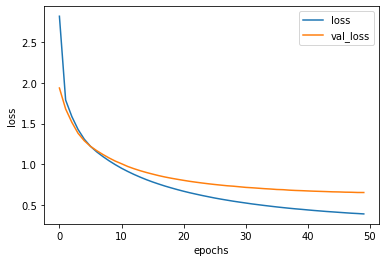

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(labels=["loss", "val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## **Evaluation Metrics**

In NMT, there are diverse evaluation metrics from human evaluation methods to automatic evaluation metrics [5]. In previous diverse neural machine traslation tasks [6] [7], the mostly used evelaution metrics are BLEU score. Therefore, among diverse evlauation metrics, we use BLEU score and ROUGE score for our model's evaluation. 


<img src = "https://drive.google.com/uc?id=1JuvHUO16HlSU7N6B5zSPDOM3BVAKsXuL" height = 300 width = 400>


**BLEU Score [8] (n-gram precision)**

  BLEU is based on the degree of n-gram overlapping between the strings of words produced by the machine and the human translation references at the corpus level. BLEU computes the precision for n-gram of size 1-to-4 with
the coefficient of brevity penalty (BP).


**ROUGE Score [9] (n-gram recall)**

  ROUGE compare an automatically produced summary or translation against a reference or a set of references (human-produced) summary or translation. ROUGE is another metric that focuses upon recall rather than precision like BLEU.

* Diverse Variations, here we focus on ROUGE-1, ROUGE-2 and ROUGE-L

  1) ROUGE-N: how many n-grams from the reference translation have been properly predicted in the machine generated translation

  (ROUGE-1: unigrams, ROUGE-2: bigrams)

  2) ROUGE-L: measure of recall for longest common subsequences. 

---------------
BLEU focuses on precision: how much the words (and/or n-grams) in the candidate model outputs appear in the human reference.

ROUGE focuses on recall: how much the words (and/or n-grams) in the human references appear in the candidate model outputs.

These results are complementing, as is often the case in the precision-recall tradeoff. Therefore, we try to check both metrics for our model's evaluation.



In [ ]:
pip install rouge

In [ ]:
import nltk.translate.bleu_score as bleu
from rouge import Rouge

#### LSTM Inference 
In sequence-to-sequence, how it works in training phase and test phase is different. Therefore, we have to design model for test phase (especially, we need to change decoder). 


* Overall translation process is as follows. 

  1) Input source sentence to be translated into encoder and get the final step's hidden and cell state. 

  2) Encoder's final hidden state, cell state and \<sos> token is sent to decoder.

  3) Decoder iterate next word prediction until \<eos> token.

  4) The input and output of encoder, encoder_inputs and encoder_states is reused that was defined in training phase. We get all layers from encoder_inputs to encoder_states in training phase. That is, we reuse encoder used in training phase.

  5) We control decoder's every step in test phase, so we define decoder_state_input_h, decoder_state_input_c which store previous step's state. 

In [ ]:
# Encoder
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder 
# Tensor for previous step's state 
decoder_state_input_h = Input(shape=(hidden_units,))
decoder_state_input_c = Input(shape=(hidden_units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# Reuse Embedding layer that was used in training phase 
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict next word.. 
# Previous time step's state -> current time step's initial state  
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]

# Predict word in every time step 
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Updated decoder 
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [ ]:
def decode_sequence(input_seq):
    # Get last step's state(hidden state, cell state) of encoder from input sequence
    states_value = encoder_model.predict(input_seq)
    
    # generate integer corresponding <SOS>
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_to_index['<sos>']
    
    stop_condition = False
    decoded_sentence = ''
    
    # Iterate loop until stop_condition becomes True (we use batch size 1 for implementation simplification)
    
    while not stop_condition:
        # use previous step's states_value as current step's initial state 
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        
        # transform predicted result to word 
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]
        
        # add current step's predicted word to predicted sentence 
        decoded_sentence += ' '+sampled_char
        
        # reach <eos> or exceed range -> stop
        if (sampled_char == '<eos>' or len(decoded_sentence) > 50):
            stop_condition = True
            
        # to use current step's predicted result to next step's input
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        # to use current step's state in next step's state 
        states_value = [h, c]
        
    return decoded_sentence

In [128]:
# transform original sentence's integer sequence to text sequence 
# English integer sequence -> English text sequence
def seq_to_src(input_seq):
    sentence = ''
    for encoded_word in input_seq:
        if(encoded_word != 0):
            sentence = sentence + index_to_src[encoded_word] + ' '
    return sentence

# transform translated sentence's integer sequence to text sequence
# French integer sequence -> French text sequence
def seq_to_tar(input_seq):
    sentence = ''
    for encoded_word in input_seq:
        if(encoded_word != 0 and encoded_word != tar_to_index['<sos>'] and encoded_word != tar_to_index['<eos>']):
            sentence = sentence + index_to_tar[encoded_word] + ' '
            
    return sentence

### LSTM Evaluation

In [ ]:
rouge = Rouge()

for seq_index in [3, 55, 1020, 300, 1001]:
    reference = [[]]
    candidate = []
    input_seq = encoder_input_train[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    

    input_sentence = seq_to_src(encoder_input_train[seq_index])
    answer_sentence = seq_to_tar(decoder_input_train[seq_index])
    translated_sentence = decoded_sentence[1:-5]

    print("Input Sentence :", input_sentence)
    print("Answer Sentence: ", answer_sentence)
    print("Translated Sentence :", translated_sentence)

    print(rouge.get_scores([translated_sentence], [answer_sentence], avg=True))
    reference[0].extend(answer_sentence.split())
    candidate.extend(translated_sentence.split())
    print('BLEU-1 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))))
    print('BLEU-2 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(0, 1, 0, 0))))
    print('BLEU-3 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(0, 0, 1, 0))))
    print('BLEU-4 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(0, 0, 0, 1))))

    print("-"*50)

1/1 [==============================] - 0s 26ms/step
Input Sentence : yeah you re right . 
Answer Sentence:  ouais vous avez raison . 
Translated Sentence : ouais tu as raison . 
{'rouge-1': {'r': 0.6, 'p': 0.6, 'f': 0.5999999950000001}, 'rouge-2': {'r': 0.25, 'p': 0.25, 'f': 0.24999999500000009}, 'rouge-l': {'r': 0.6, 'p': 0.6, 'f': 0.5999999950000001}}
BLEU-1 score: 0.60000
BLEU-2 score: 0.25000
BLEU-3 score: 0.00000
BLEU-4 score: 0.00000
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
Input Sentence : i know tom is sensible . 
Answer Sentence:  je sais que tom est raisonnable . 
Translated Sentence : je sais que tom est raisonnable . 
{'rouge-1': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-2': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-l': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}}
BLEU-1 score: 1.00000
BLEU-2 score: 1.00000
BLEU-3 score: 1.00000
BLEU-4 score: 1.00000
--------------------------------------------------
1/1 [==

#### GRU model with same hyperparameter

In [ ]:
## GRU
### Encoder
encoder_inputs = Input(shape=(None,), name="encoder_input")
embedding = Embedding(
    src_vocab_size, embedding_dim, name="encoder_embedding"
)
encoder_gru = GRU(
    hidden_units, return_state=True, name="encoder_gru", dropout=encoder_dropout
)
encoder_emb = embedding(encoder_inputs)
encoder_outputs, encoder_state = encoder_gru(encoder_emb)

  ### Decoder
decoder_inputs = Input(shape=(None,), name="decoder_input")
embedding = Embedding(
    tar_vocab_size, embedding_dim, input_length=tar_seqlen-1, name="decoder_embedding"
  )
decoder_gru = GRU(
    hidden_units, return_state=True, return_sequences=True, name="decoder_gru", 
    dropout=decoder_dropout
)

decoder_emb = embedding(decoder_inputs)
decoder_outputs, _ = decoder_gru(decoder_emb, initial_state=encoder_state)
dense_layer = Dense(tar_vocab_size, activation="softmax", name="dense_layer")
decoder_outputs = dense_layer(decoder_outputs)

  # Define the Model which accepts encoder/decoder inputs and outputs predictions
model = Model(
    inputs=[encoder_inputs, decoder_inputs],
    outputs=decoder_outputs,
    name="encoder_decoder_model_gru",
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
        validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
        batch_size=batchsize, callbacks=[EarlyStopping(monitor='val_loss', patience = 10)], epochs=50) # for testing, we use epochs = 10 

Epoch 1/50
493/493 [==============================] - 19s 32ms/step - loss: 2.7961 - acc: 0.6422 - val_loss: 1.8180 - val_acc: 0.7192
Epoch 2/50
493/493 [==============================] - 15s 31ms/step - loss: 1.6975 - acc: 0.7283 - val_loss: 1.6294 - val_acc: 0.7350
Epoch 3/50
493/493 [==============================] - 15s 31ms/step - loss: 1.5571 - acc: 0.7422 - val_loss: 1.5171 - val_acc: 0.7488
Epoch 4/50
493/493 [==============================] - 15s 31ms/step - loss: 1.4334 - acc: 0.7562 - val_loss: 1.3820 - val_acc: 0.7662
Epoch 5/50
493/493 [==============================] - 15s 31ms/step - loss: 1.2983 - acc: 0.7772 - val_loss: 1.2724 - val_acc: 0.7833
Epoch 6/50
493/493 [==============================] - 15s 31ms/step - loss: 1.1920 - acc: 0.7915 - val_loss: 1.1878 - val_acc: 0.7956
Epoch 7/50
493/493 [==============================] - 15s 31ms/step - loss: 1.1080 - acc: 0.8032 - val_loss: 1.1253 - val_acc: 0.8058
Epoch 8/50
493/493 [==============================] - 15s 31ms

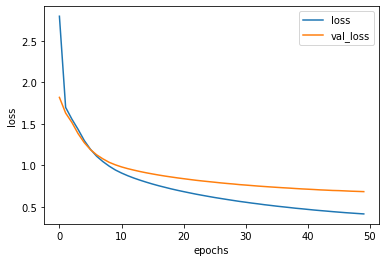

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(labels=["loss", "val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#### GRU inference & evalulation

In [ ]:
def create_inference_encoder_from(input_layer, embedding_layer, gru_layer):
  encoder_embedding = embedding_layer(input_layer)
  encoder_outputs, encoder_state = gru_layer(encoder_embedding)
  encoder = Model(input_layer, encoder_state)
  return encoder

def create_inference_decoder_from(input_layer, embedding_layer, gru_layer, dense_layer):
  decoder_embedding = embedding_layer(input_layer)
  input_shape = dense_layer.input.shape[-1]
  decoder_inputs_state = Input(shape=(input_shape,))

  decoder_output, decoder_output_state = gru_layer(
    decoder_embedding, initial_state=decoder_inputs_state
  )

  decoder_prediction = dense_layer(decoder_output)
  decoder = Model(
    inputs=[input_layer, decoder_inputs_state], 
    outputs=[decoder_prediction, decoder_output_state]
  )
  return decoder

In [ ]:
encoder = create_inference_encoder_from(
  model.get_layer('encoder_input').input,
  model.get_layer('encoder_embedding'),
  model.get_layer('encoder_gru')
)

decoder = create_inference_decoder_from(
  model.get_layer('decoder_input').input,
  model.get_layer('decoder_embedding'),
  model.get_layer('decoder_gru'),
  model.get_layer('dense_layer'),
)

In [ ]:
def decode_sequence(input_seq):
    # Get last step's state(hidden state, cell state) of encoder from input sequence
    state = encoder.predict(input_seq)
    
    # generate integer corresponding <SOS>
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_to_index['<sos>']
    
    stop_condition = False
    decoded_sentence = ''
    
    # Iterate loop until stop_condition becomes True (we use batch size 1 for implementation simplification)
    
    while not stop_condition:
        # use previous step's states_value as current step's initial state 
        output_tokens, state = decoder.predict([target_seq, state])
        
        # transform predicted result to word 
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]
        
        # add current step's predicted word to predicted sentence 
        decoded_sentence += ' '+sampled_char
        
        # reach <eos> or exceed range -> stop
        if (sampled_char == '<eos>' or len(decoded_sentence) > 50):
            stop_condition = True
            
        # to use current step's predicted result to next step's input
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        # to use current step's state in next step's state 
        state = [state]
        
    return decoded_sentence

In [ ]:
rouge = Rouge()

for seq_index in [3, 55, 1020, 300, 1001]:
    reference = [[]]
    candidate = []
    input_seq = encoder_input_train[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    

    input_sentence = seq_to_src(encoder_input_train[seq_index])
    answer_sentence = seq_to_tar(decoder_input_train[seq_index])
    translated_sentence = decoded_sentence[1:-5]

    print("Input Sentence :", input_sentence)
    print("Answer Sentence: ", answer_sentence)
    print("Translated Sentence :", translated_sentence)

    print(rouge.get_scores([translated_sentence], [answer_sentence], avg=True))
    reference[0].extend(answer_sentence.split())
    candidate.extend(translated_sentence.split())

    print('BLEU-1 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))))
    print('BLEU-2 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(0, 1, 0, 0))))
    print('BLEU-3 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(0, 0, 1, 0))))
    print('BLEU-4 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(0, 0, 0, 1))))
    
    print("-"*50)

1/1 [==============================] - 0s 14ms/step
Input Sentence : yeah you re right . 
Answer Sentence:  ouais vous avez raison . 
Translated Sentence : ouais tu as raison . 
{'rouge-1': {'r': 0.6, 'p': 0.6, 'f': 0.5999999950000001}, 'rouge-2': {'r': 0.25, 'p': 0.25, 'f': 0.24999999500000009}, 'rouge-l': {'r': 0.6, 'p': 0.6, 'f': 0.5999999950000001}}
BLEU-1 score: 0.60000
BLEU-2 score: 0.25000
BLEU-3 score: 0.00000
BLEU-4 score: 0.00000
--------------------------------------------------
1/1 [==============================] - 0s 14ms/step
Input Sentence : i know tom is sensible . 
Answer Sentence:  je sais que tom est raisonnable . 
Translated Sentence : je sais que tom est agite . 
{'rouge-1': {'r': 0.8571428571428571, 'p': 0.8571428571428571, 'f': 0.8571428521428571}, 'rouge-2': {'r': 0.6666666666666666, 'p': 0.6666666666666666, 'f': 0.6666666616666668}, 'rouge-l': {'r': 0.8571428571428571, 'p': 0.8571428571428571, 'f': 0.8571428521428571}}
BLEU-1 score: 0.85714
BLEU-2 score: 0.666

# **Final Model - LSTM**
Comparing BLEU-1, BLEU-2, BLEU-3, BLEU-4, the LSTM overally shows better performance compared to GRU. 

<img src = "https://drive.google.com/uc?id=1KLOz1mVR7XJvgPxAejy23eTxtR3q9Zab" height = 350 width = 500>

Also, comparing ROUGE-1, ROUGE-2, ROUGE-L, the LSTM overally shows better performance compared to GRU. 

<img src = "https://drive.google.com/uc?id=1EsAAGH37dFSZB4aAJXmFWpvfPg0OsN2o" height = 400 width = 500>


Therefore, we try to use LSTM for our neural machine translation model.



## **LSTM model**

In [ ]:
def LSTM_Model(embedding_dim, hidden_units, lr, b1, b2, batchsize, encoder_dropout, decoder_dropout):
  encoder_inputs = Input(shape=(None,))
  enc_emb = Embedding(src_vocab_size, embedding_dim)(encoder_inputs) # Embedding layer
  enc_masking = Masking(mask_value=0.0)(enc_emb) # Exclude padding 0 in operation
  encoder_lstm = LSTM(hidden_units, return_state=True, dropout=encoder_dropout) # To return state value
  encoder_outputs, state_h, state_c = encoder_lstm(enc_masking) # Return hidden state and cell state
  encoder_states = [state_h, state_c] # Save encoder's hidden state and cell state -> to decoder!

  # Decoder
  decoder_inputs = Input(shape=(None,))
  dec_emb_layer = Embedding(tar_vocab_size, hidden_units) # Embedding layer
  dec_emb = dec_emb_layer(decoder_inputs) # exclude padding 0 in operation
  dec_masking = Masking(mask_value=0.0)(dec_emb)

  # To return state value, return_state = True
  # To predict word for every time step, return_sequences = True
  decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=decoder_dropout) 

  # Use encoder's hidden state as initial hidden state 
  decoder_outputs, _, _ = decoder_lstm(dec_masking,
                                      initial_state=encoder_states)

  # predict word bsaed on softmax activation function for all results from every time step
  decoder_dense = Dense(tar_vocab_size, activation='softmax')
  decoder_outputs = decoder_dense(decoder_outputs)

  # Model's input and output 
  model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

  model.compile(optimizer=optimizers.Adam(learning_rate=lr, beta_1=b1, beta_2=b2), loss='sparse_categorical_crossentropy', metrics=['acc'])

  history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=batchsize, callbacks=[EarlyStopping(monitor='val_loss', patience = 3)], epochs=10) # for testing, we use epochs = 10 

  return history.history['val_loss'][-1]

#### **Hyperparameter Tuning**

In [ ]:
def get_hyper_param(n_iteration):
  hyper_param = []  # learning_rate, n_hidden, timestep, epochs
  for i in range(n_iteration):
    current_params = []
    # We use adam optimizer, so we tune learning rate, b1, b2
    current_params.append(np.random.uniform(0,0.1)) # learning rate 
    current_params.append(np.random.uniform(0.5,0.999)) # b1 (from Momentum)
    current_params.append(np.random.uniform(0.5,0.999)) # b2 (from RMSProp)
    current_params.append(np.random.randint(1,513)) # hidden units 
    current_params.append(np.random.randint(32,513)) # batch_size
    current_params.append(np.random.randint(50,300)) # embedding dimension
    current_params.append(np.random.uniform(0,0.5)) # encoder dropout
    current_params.append(np.random.uniform(0,0.5)) # decoder dropout
    hyper_param.append(current_params)
  return hyper_param

hyper_parameter = get_hyper_param(30)
train_loss, val_loss = list(), list()
best_params = []

min_val_loss = 999
for alpha, b1, b2, hidden_units, batch_size, embedding_dim, en_dropout, de_dropout in hyper_parameter:
  print('lr',alpha, 'b1', b1, 'b2', b2, 'n_hiddens', hidden_units,'batch_size', batch_size, 'embedding_dim', embedding_dim, 
        'en_dropout',  en_dropout, 'de_dropout', de_dropout)

  current_val_loss = LSTM_Model(embedding_dim, hidden_units, alpha, b1, b2, batch_size, en_dropout, de_dropout)

  if current_val_loss < min_val_loss:
    min_val_loss = current_val_loss
    best_params = [alpha, b1, b2, hidden_units, batch_size, embedding_dim, en_dropout, de_dropout]
    print('best_params',best_params)
  
print('final best params',best_params)

lr 0.06270461188149924 b1 0.843482643498749 b2 0.8925307649479214 n_hiddens 376 batch_size 455 embedding_dim 225 en_dropout 0.25149046826372107 de_dropout 0.28754374782314557
Epoch 1/10
139/139 [==============================] - 30s 161ms/step - loss: 1.9090 - acc: 0.7286 - val_loss: 1.3475 - val_acc: 0.7799
Epoch 2/10
139/139 [==============================] - 19s 140ms/step - loss: 1.2717 - acc: 0.7855 - val_loss: 1.2778 - val_acc: 0.7887
Epoch 3/10
139/139 [==============================] - 20s 141ms/step - loss: 1.2140 - acc: 0.7914 - val_loss: 1.2685 - val_acc: 0.7928
Epoch 4/10
139/139 [==============================] - 19s 140ms/step - loss: 1.1871 - acc: 0.7942 - val_loss: 1.2826 - val_acc: 0.7924
Epoch 5/10
139/139 [==============================] - 19s 139ms/step - loss: 1.1731 - acc: 0.7954 - val_loss: 1.2741 - val_acc: 0.7956
Epoch 6/10
139/139 [==============================] - 19s 139ms/step - loss: 1.1693 - acc: 0.7960 - val_loss: 1.2842 - val_acc: 0.7953
best_params [0.

### **Final LSTM model**

Based on best hyperparameter from hyperparameter tuning process, we build our final LSTM model with them. 

In [108]:
# learning rate, b1, b2, hidden_units, batch_size, embedding_dim, encoder dropout, decoder dropout
print('final best params',best_params)
LSTM_final_lr = best_params[0]
LSTM_final_b1 = best_params[1]
LSTM_final_b2 = best_params[2]
hidden_units = best_params[3]
LSTM_final_batch = best_params[4]
embedding_dim = best_params[5]
LSTM_final_enD = best_params[6]
LSTM_final_deD = best_params[7]

final best params [0.015886169959430787, 0.5930491086706786, 0.9364600597831465, 312, 273, 166, 0.1266038983112921, 0.47534027805897144]


In [107]:
best_params = [0.015886169959430787, 0.5930491086706786, 0.9364600597831465, 312, 273, 166, 0.1266038983112921, 0.47534027805897144]

In [121]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(src_vocab_size, embedding_dim)(encoder_inputs) # Embedding layer
enc_masking = Masking(mask_value=0.0)(enc_emb) # Exclude padding 0 in operation
encoder_lstm = LSTM(hidden_units, return_state=True) # To return state value
encoder_outputs, state_h, state_c = encoder_lstm(enc_masking) # Return hidden state and cell state
encoder_states = [state_h, state_c] # Save encoder's hidden state and cell state

# Decoder
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(tar_vocab_size, hidden_units) # Embedding layer
dec_emb = dec_emb_layer(decoder_inputs) # exclude padding 0 in operation
dec_masking = Masking(mask_value=0.0)(dec_emb)

# To return state value, return_state = True
# To predict word for every time step, return_sequences = True
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True) 

# Use encoder's hidden state as initial hidden state 
decoder_outputs, _, _ = decoder_lstm(dec_masking,
                                     initial_state=encoder_states)

# predict word bsaed on softmax activation function for all results from every time step
decoder_dense = Dense(tar_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model's input and output 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer=optimizers.Adam(learning_rate=LSTM_final_lr, beta_1=LSTM_final_b1, beta_2=LSTM_final_b2), 
              loss='sparse_categorical_crossentropy', metrics=['acc'])

model_weights_path = './gdrive/MyDrive/AI/teamProject/LSTM/weights/weights.ckpt'

save_best_weights = ModelCheckpoint(
  model_weights_path, monitor='val_loss', mode='min',
  save_weights_only=True, save_best_only=True, verbose=1, 
)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
        validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
        batch_size=LSTM_final_batch, callbacks=[save_best_weights,EarlyStopping(monitor='val_loss', patience = 10)], epochs=50) 

Epoch 1/50
231/231 [==============================] - ETA: 0s - loss: 1.4925 - acc: 0.7664
Epoch 1: val_loss improved from inf to 0.96674, saving model to ./gdrive/MyDrive/AI/teamProject/LSTM/weights/weights.ckpt
231/231 [==============================] - 31s 101ms/step - loss: 1.4925 - acc: 0.7664 - val_loss: 0.9667 - val_acc: 0.8307
Epoch 2/50
231/231 [==============================] - ETA: 0s - loss: 0.7986 - acc: 0.8500
Epoch 2: val_loss improved from 0.96674 to 0.77422, saving model to ./gdrive/MyDrive/AI/teamProject/LSTM/weights/weights.ckpt
231/231 [==============================] - 21s 90ms/step - loss: 0.7986 - acc: 0.8500 - val_loss: 0.7742 - val_acc: 0.8559
Epoch 3/50
231/231 [==============================] - ETA: 0s - loss: 0.6051 - acc: 0.8753
Epoch 3: val_loss improved from 0.77422 to 0.69638, saving model to ./gdrive/MyDrive/AI/teamProject/LSTM/weights/weights.ckpt
231/231 [==============================] - 21s 90ms/step - loss: 0.6051 - acc: 0.8753 - val_loss: 0.6964 -

### Inference



In [122]:
# Encoder
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder 
# Tensor for previous step's state 
decoder_state_input_h = Input(shape=(hidden_units,))
decoder_state_input_c = Input(shape=(hidden_units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# Reuse Embedding layer that was used in training phase 
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict next word.. 
# Previous time step's state -> current time step's initial state  
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]

# Predict word in every time step 
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Updated decoder 
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [123]:
def decode_sequence(input_seq):
    # Get last step's state(hidden state, cell state) of encoder from input sequence
    states_value = encoder_model.predict(input_seq)
    
    # generate integer corresponding <SOS>
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_to_index['<sos>']
    
    stop_condition = False
    decoded_sentence = ''
    
    # Iterate loop until stop_condition becomes True (we use batch size 1 for implementation simplification)
    
    while not stop_condition:
        # use previous step's states_value as current step's initial state 
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        
        # transform predicted result to word 
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]
        
        # add current step's predicted word to predicted sentence 
        decoded_sentence += ' '+sampled_char
        
        # reach <eos> or exceed range -> stop
        if (sampled_char == '<eos>' or len(decoded_sentence) > 50):
            stop_condition = True
            
        # to use current step's predicted result to next step's input
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        # to use current step's state in next step's state 
        states_value = [h, c]
        
    return decoded_sentence

### Evaluation Result

In [ ]:
rouge = Rouge()

for seq_index in [3, 55, 1020, 300, 1001]:
    reference = [[]]
    candidate = []
    input_seq = encoder_input_train[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    

    input_sentence = seq_to_src(encoder_input_train[seq_index])
    answer_sentence = seq_to_tar(decoder_input_train[seq_index])
    translated_sentence = decoded_sentence[1:-5]

    print("Input Sentence :", input_sentence)
    print("Answer Sentence: ", answer_sentence)
    print("Translated Sentence :", translated_sentence)

    print(rouge.get_scores([translated_sentence], [answer_sentence], avg=True))
    reference[0].extend(answer_sentence.split())
    candidate.extend(translated_sentence.split())
    print('BLEU-1 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))))
    print('BLEU-2 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(0, 1, 0, 0))))
    print('BLEU-3 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(0, 0, 1, 0))))
    print('BLEU-4 score: {:.5f}'.format(bleu.sentence_bleu(reference, candidate, weights=(0, 0, 0, 1))))

    print("-"*50)

1/1 [==============================] - 0s 16ms/step
Input Sentence : yeah you re right . 
Answer Sentence:  ouais vous avez raison . 
Translated Sentence : ouais vous avez raison . 
{'rouge-1': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-2': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-l': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}}
BLEU-1 score: 1.00000
BLEU-2 score: 1.00000
BLEU-3 score: 1.00000
BLEU-4 score: 1.00000
--------------------------------------------------
1/1 [==============================] - 0s 18ms/step
Input Sentence : i know tom is sensible . 
Answer Sentence:  je sais que tom est raisonnable . 
Translated Sentence : je sais que tom est raisonnable . 
{'rouge-1': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-2': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-l': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}}
BLEU-1 score: 1.00000
BLEU-2 score: 1.00000
BLEU-3 score: 1.00000
BLEU-4 score: 1.00000
--------------------------------------------------
1/1 [======================

Compared to previous LSTM model, we can see that in some case shows better performance with high difference. And some case shows lower performance relatively small difference. 

<img src = "https://drive.google.com/uc?id=1Sc11jo7iYAcnHdiVDCi8-Xnw15jVexr6" height = 350 width = 500>

<img src = "https://drive.google.com/uc?id=1hNKPiXj5ACMFf24Dp1ymDkH5urTOZwDZ" height = 350 width = 450>

# **Final Outputs**

Our final application is making voice with translated text.

In [255]:
braille_sentence = preprocess_sentence(braille_sentence)
braille_split = braille_sentence.split()

result_seq = []
for word in braille_split:
  result_seq.append(src_to_index[word])

for i in range(9-len(result_seq)):
  result_seq.append(0)

In [256]:
input_sentence2 = seq_to_src(result_seq)
decoded_sentence2 = decode_sequence([result_seq])
final_translated_text = decoded_sentence2[1:-5]
print("Input sentence from braille translation: ", input_sentence2)
print("Translated result: ", final_translated_text)

1/1 [==============================] - 0s 15ms/step
Input sentence from braille translation:  i like busy place 
Translated result:  j aime beaucoup plus vite . 


In [243]:
 pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 96 kB 6.5 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [246]:
from gtts import gTTS

In [259]:
tts = gTTS(text=final_translated_text, lang='fr')
tts.save("translatedText.mp3")

### Voice output of translated Text

https://drive.google.com/file/d/1KDs7nwXlUbGDIOIqSqpiHXXOqHiRWNfl/view?usp=share_link

---------
# **References**

[1] Braille book and voice book supply, Union News, https://www.yna.co.kr/view/AKR20220104120700371

[2] Braille Classifier, Kaggle, https://www.kaggle.com/code/kwisatzhaderach/braille-classifier-keras/data

[3] Howard, Andrew G., et al. "Mobilenets: Efficient convolutional neural networks for mobile vision applications." arXiv preprint arXiv:1704.04861 (2017)

[4] Tan, Mingxing, and Quoc Le. "Efficientnet: Rethinking model scaling for convolutional neural networks." International conference on machine learning. PMLR, 2019.

[5] Han, Lifeng. "Machine translation evaluation resources and methods: A survey." arXiv preprint arXiv:1605.04515 (2016).

[6] Chimalamarri, Santwana, and Dinkar Sitaram. "Linguistically enhanced word segmentation for better neural machine translation of low resource agglutinative languages." International Journal of Speech Technology 24.4 (2021): 1047-1053.

[7] Wu, Yonghui, et al. "Google's neural machine translation system: Bridging the gap between human and machine translation." arXiv preprint arXiv:1609.08144 (2016).

[8] Papineni, Kishore, et al. "Bleu: a method for automatic evaluation of machine translation." Proceedings of the 40th annual meeting of the Association for Computational Linguistics. 2002.

[9] Chin-Yew Lin. 2004. ROUGE: A Package for Automatic Evaluation of Summaries. In Text Summarization Branches Out, pages 74–81, Barcelona, Spain. Association for Computational Linguistics.



--------
# **Insights and discussions**

There is a problem in test case for braille translation. Because the width and length of input image is not constant, we failed generalization to crop each character in braille image. If it is possible to recognize the width and length of the image with braille detection model, the generalization will be achieved.



And during our project we wonder if it is possible to compare two models with different hyperparameter (Here, LSTM and GRU model). We found some other previous researches that did comparison between LSTM and GRU model with different hyperparameters. But in common sense, we wondered it was worth comparing different hyperparameters because hyperparameters also important factor that affect to performance. 

--------
# **Member's contribution statement**

### Kim-Jong-Gyu
- presentor 
- building braille translation model (including data gathering and preprocessing)
- explore related research (about motivation of the project, advancing CNN model)
- make presentation materials



### Lee-Do-Hui
- presentor
- building neural machine translation model (including data gathering and preprocessing)
- explore related research (about neural machine translation evaluation metrics)
- make presentation materials

------
# **Debugging experience worth sharing**

For improving CNN model, trying diverse advancing techniques requires a lot of efforts.

Unlike previous experiences, finding evaluation metrics fitted for our models takes a lot of time to search about related work's evaluation.



-------
# **The Github repository with the commit history**
https://github.com/Kim-Jong-Gyu/AI-teamProject-brailleTranslation